# Tratamiento de valores nulos

In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings

from collections import Counter

warnings.filterwarnings('ignore')

In [138]:
data = pd.read_csv('../Datasets/application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df_null = pd.DataFrame()
nulos = data.isnull().mean()
nulos = nulos[nulos>0]
df_null['variables'] = nulos.index
df_null['% nulos'] = nulos.values
df_null.sort_values('% nulos',ascending=False)

,variables,% nulos
41,COMMONAREA_MEDI,0.698723
13,COMMONAREA_AVG,0.698723
27,COMMONAREA_MODE,0.698723
49,NONLIVINGAPARTMENTS_MEDI,0.694330
35,NONLIVINGAPARTMENTS_MODE,0.694330
...,...,...
7,EXT_SOURCE_2,0.002146
1,AMT_GOODS_PRICE,0.000904
0,AMT_ANNUITY,0.000039
5,CNT_FAM_MEMBERS,0.000007


## Variables de agregacion

In [140]:
vars_agr_1 = [col for col in data if 'AVG' in col or 'MEDI' in col  or 'MODE' in col]
vars_agr_2 = list(set([col.replace('_AVG','').replace('_MEDI','').replace('_MODE','') for col in vars_agr_1]))

In [141]:
print(data[vars_agr_1].select_dtypes(include=('float','int')).shape)
print(data[vars_agr_1].select_dtypes(include='O').shape)

(307511, 43)
(307511, 4)


In [142]:
listas = []
for var2 in vars_agr_2:
    lista = []
    for var1 in vars_agr_1:
        var11 = var1.replace('_AVG','').replace('_MEDI','').replace('_MODE','')
        if var11 == var2:
            lista.append(var1)
    listas.append(lista)
listas

[['TOTALAREA_MODE'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI'],
 ['ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI'],
 ['FONDKAPREMONT_MODE'],
 ['HOUSETYPE_MODE'],
 ['LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI'],
 ['EMERGENCYSTATE_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI'],
 ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
 ['APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MODE',
  'YEARS_BEGINEXPLUATATION_MEDI'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI'],
 ['WALLSMATERIAL_MODE'],
 ['BASEMENTAREA_AVG', 'BASEME

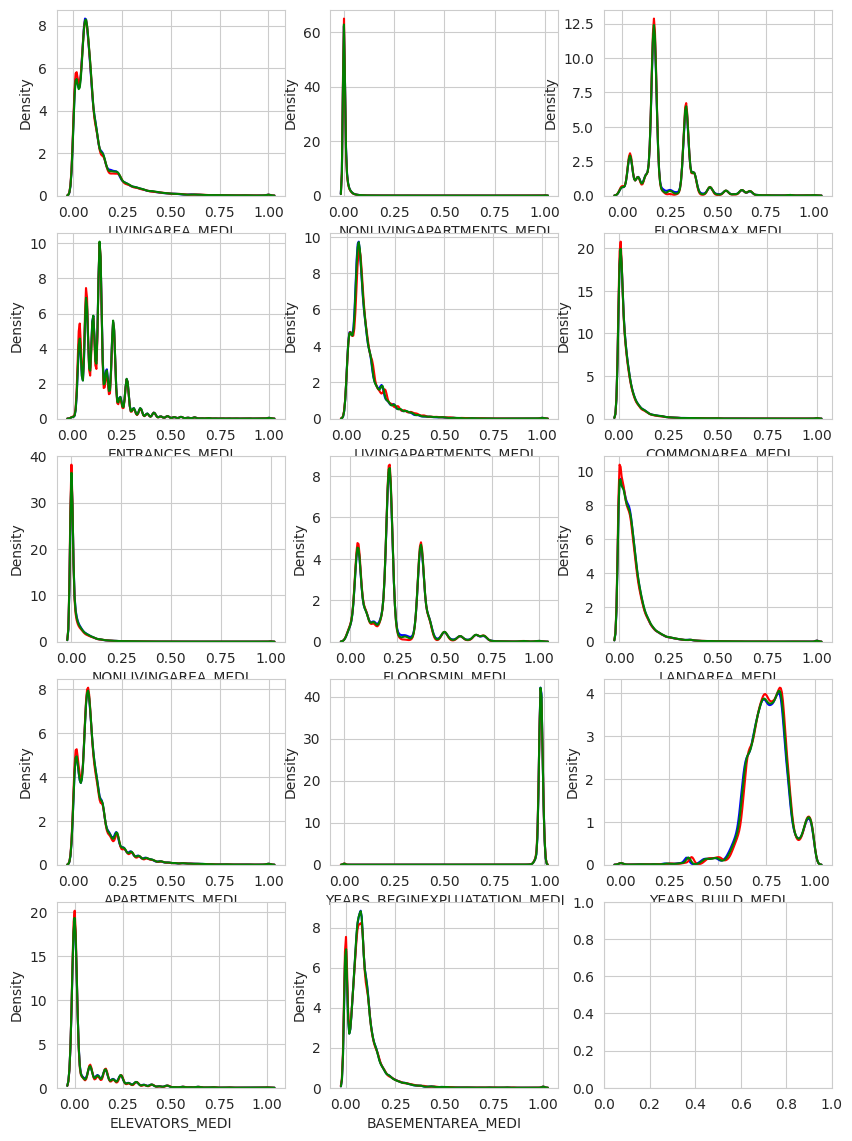

In [143]:
f,ax = plt.subplots(5,3)
f.set_size_inches(10,14)
sns.set_style('whitegrid')
colors = ['blue','red','green']

listas_vars = [lista for lista in listas if len(lista)==3]

for i,lista_vars in enumerate(listas_vars):
    l = i//3
    k = i%3
    for var,color in zip(lista_vars,colors):
        sns.distplot(data[var],hist=False,kde=True,color=color,ax=ax[l][k])
plt.show()

In [144]:
for lista in listas:
    cadena = lista[0].replace('_AVG','')
    print(f'============ {cadena} =============')
    print(data[lista].describe())

============ TOTALAREA_MODE =============
       TOTALAREA_MODE
count   159080.000000
mean         0.102547
std          0.107462
min          0.000000
25%          0.041200
50%          0.068800
75%          0.127600
max          1.000000
============ LIVINGAREA =============
       LIVINGAREA_AVG  LIVINGAREA_MODE  LIVINGAREA_MEDI
count   153161.000000    153161.000000    153161.000000
mean         0.107399         0.105975         0.108607
std          0.110565         0.111845         0.112260
min          0.000000         0.000000         0.000000
25%          0.045300         0.042700         0.045700
50%          0.074500         0.073100         0.074900
75%          0.129900         0.125200         0.130300
max          1.000000         1.000000         1.000000
============ NONLIVINGAPARTMENTS =============
       NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MODE  \
count             93997.000000              93997.000000   
mean                  0.008809                  0.0

In [145]:
def num_outliers(df,var,k):
    q1,q3 = df[var].quantile(0.25),df[var].quantile(0.75)
    iqr = q3 - q1
    out_sup,out_inf = q3 + iqr*k,q1 - iqr*k
    count_sup = df[df[var]>out_sup].shape[0]
    count_inf = df[df[var]<out_inf].shape[0]
    return count_sup+count_inf

In [146]:
listas_vars = [lista for lista in listas if len(lista)==3]
lista_pick = []
for lista in listas_vars:
    out_num = []
    for var in lista:
        out_num.append(num_outliers(data,var,1.5))
    ind_var = np.argmin(out_num)
    lista_pick.append(lista[ind_var])

In [147]:
lista_pick += ['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','HOUSETYPE_MODE','TOTALAREA_MODE']
lista_pick

['LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'FLOORSMAX_MODE',
 'ENTRANCES_MODE',
 'LIVINGAPARTMENTS_MODE',
 'COMMONAREA_MODE',
 'NONLIVINGAREA_AVG',
 'FLOORSMIN_MODE',
 'LANDAREA_MEDI',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_AVG',
 'ELEVATORS_MODE',
 'BASEMENTAREA_MODE',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE']

<Axes: >

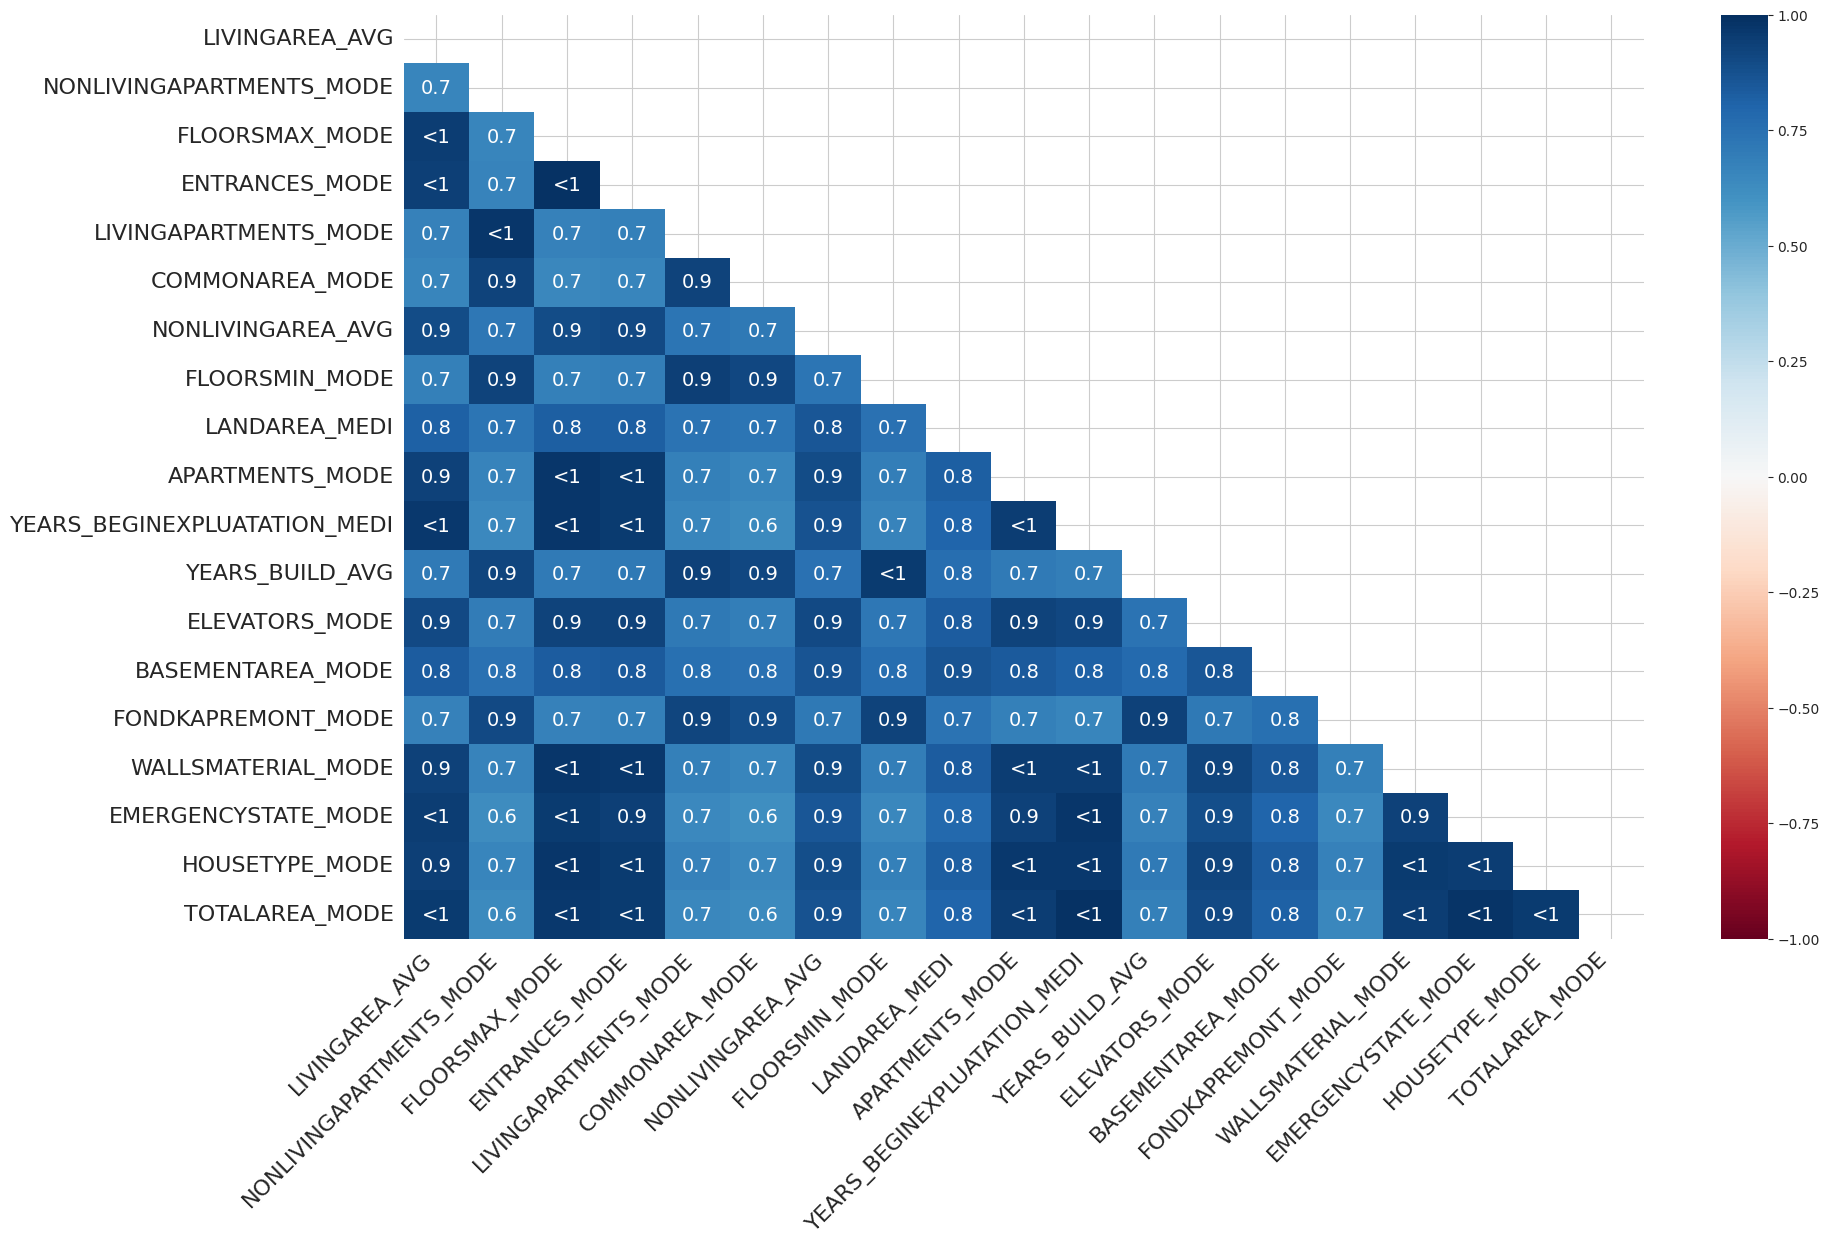

In [59]:
msno.heatmap(data[lista_pick])

In [148]:
nulos = data[lista_pick].isnull().mean()
columnas = [col.replace('_MEDI','').replace('_AVG','').replace('_MODE','') for col in nulos.index]

data_pick = data[lista_pick]
data_pick.columns = columnas

df_null_pick = pd.DataFrame()
df_null_pick['variables'] = columnas
df_null_pick['% nulos'] = nulos.values

df_null_pick.describe()

,% nulos
count,19.000000
mean,0.570146
std,0.085448
min,0.473983
25%,0.501847
50%,0.532960
75%,0.671732
max,0.698723


In [149]:
data_pick.head()

,LIVINGAREA,NONLIVINGAPARTMENTS,FLOORSMAX,ENTRANCES,LIVINGAPARTMENTS,COMMONAREA,NONLIVINGAREA,FLOORSMIN,LANDAREA,APARTMENTS,YEARS_BEGINEXPLUATATION,YEARS_BUILD,ELEVATORS,BASEMENTAREA,FONDKAPREMONT,WALLSMATERIAL,EMERGENCYSTATE,HOUSETYPE,TOTALAREA
0,0.0190,0.0,0.0833,0.0690,0.022,0.0144,0.0000,0.1250,0.0375,0.0252,0.9722,0.6192,0.0000,0.0383,reg oper account,"Stone, brick",No,block of flats,0.0149
1,0.0549,0.0,0.2917,0.0345,0.079,0.0497,0.0098,0.3333,0.0132,0.0924,0.9851,0.7960,0.0806,0.0538,reg oper account,Block,No,block of flats,0.0714
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Cut variable para valores normalizados 
def cut_variable(df,variable,k):

    bins = []
    
    q1 = df[variable].quantile(0.25)
    q2 = df[variable].quantile(0.50)
    q3 = df[variable].quantile(0.75)
    
    cs = q3 + (q3-q1)*k
    ci = q1 - (q3-q1)*k
    
    if ci<0:
        ci = 0
    if cs>1:
        cs = 1

    bins = [0,ci,q1,q2,q3,cs,1]
    
    contador = Counter(bins)
    bins = list(contador.keys())
    
    n = len(contador)
    labels = ['grupo'+str(i) for i in range(n-1)]
    
    var_cut = pd.cut(df[variable],bins=bins,labels=labels)
    
    var_cut1 = pd.Series(list(var_cut.values))
    var_cut1 = var_cut1.fillna('nulo')
    
    return var_cut1
    

In [151]:
data_pick_2 = data_pick.copy()
for var in data_pick_2.select_dtypes(include=('int','float')):
    data_pick_2[var] = cut_variable(data_pick_2,var,1.5)
data_pick_2.fillna('nulo',inplace=True)
data_pick_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   LIVINGAREA               307511 non-null  object
 1   NONLIVINGAPARTMENTS      307511 non-null  object
 2   FLOORSMAX                307511 non-null  object
 3   ENTRANCES                307511 non-null  object
 4   LIVINGAPARTMENTS         307511 non-null  object
 5   COMMONAREA               307511 non-null  object
 6   NONLIVINGAREA            307511 non-null  object
 7   FLOORSMIN                307511 non-null  object
 8   LANDAREA                 307511 non-null  object
 9   APARTMENTS               307511 non-null  object
 10  YEARS_BEGINEXPLUATATION  307511 non-null  object
 11  YEARS_BUILD              307511 non-null  object
 12  ELEVATORS                307511 non-null  object
 13  BASEMENTAREA             307511 non-null  object
 14  FONDKAPREMONT       

In [152]:
data.drop(columns=vars_agr_1,inplace=True)
data = pd.concat((data,data_pick_2),axis=1)

In [153]:
indices = df_null.loc[df_null['variables'].isin(vars_agr_1)].index
df_null.drop(indices,axis=0,inplace=True)
df_null.reset_index(inplace=True)
df_null.drop(columns='index',inplace=True)

In [154]:
df_null

,variables,% nulos
0,AMT_ANNUITY,0.000039
1,AMT_GOODS_PRICE,0.000904
2,NAME_TYPE_SUITE,0.004201
3,OWN_CAR_AGE,0.659908
4,OCCUPATION_TYPE,0.313455
5,CNT_FAM_MEMBERS,0.000007
6,EXT_SOURCE_1,0.563811
7,EXT_SOURCE_2,0.002146
8,EXT_SOURCE_3,0.198253
9,OBS_30_CNT_SOCIAL_CIRCLE,0.003320


In [164]:
df_null[df_null['% nulos']<0.005]

,variables,% nulos
0,AMT_ANNUITY,0.000039
1,AMT_GOODS_PRICE,0.000904
2,NAME_TYPE_SUITE,0.004201
5,CNT_FAM_MEMBERS,0.000007
7,EXT_SOURCE_2,0.002146
9,OBS_30_CNT_SOCIAL_CIRCLE,0.003320
10,DEF_30_CNT_SOCIAL_CIRCLE,0.003320
11,OBS_60_CNT_SOCIAL_CIRCLE,0.003320
12,DEF_60_CNT_SOCIAL_CIRCLE,0.003320
13,DAYS_LAST_PHONE_CHANGE,0.000003


In [165]:
variables = df_null[df_null['% nulos']<0.005]['variables'].values
for var in variables:
    indices = data[data[var].isnull()].index
    valores = data.loc[indices]['TARGET'].value_counts()
    valores = valores/sum(valores)
    print(len(indices))
    print(valores)
    print('================================================')

12
TARGET
0    1.0
Name: count, dtype: float64
278
TARGET
0    0.92446
1    0.07554
Name: count, dtype: float64
1292
TARGET
0    0.94582
1    0.05418
Name: count, dtype: float64
2
TARGET
0    1.0
Name: count, dtype: float64
660
TARGET
0    0.921212
1    0.078788
Name: count, dtype: float64
1021
TARGET
0    0.96474
1    0.03526
Name: count, dtype: float64
1021
TARGET
0    0.96474
1    0.03526
Name: count, dtype: float64
1021
TARGET
0    0.96474
1    0.03526
Name: count, dtype: float64
1021
TARGET
0    0.96474
1    0.03526
Name: count, dtype: float64
1
TARGET
0    1.0
Name: count, dtype: float64
